In [2]:
import json
import math
import numpy as np

In [3]:
with open('../resultFiles/results_lab_5_cp.json', 'r') as f:
    
    data = json.loads(f.read())

In [4]:
#iterate through all combinations and compute min, max, avg for f
for algorithm in data["algorithm"]:
    
    kroa = []
    krob = []
    
    for instance in algorithm["instance"]:
        
        f_meta = np.array(instance["f"], dtype=float)
        f_meta_avg = np.average(f_meta)
        f_meta_avg = int(f_meta_avg * 100) / 100
        f_meta_min = np.min(f_meta).astype(int)
        f_meta_max = np.max(f_meta).astype(int)
        f_std = np.std(f_meta)
        f_std = int(f_std * 100) / 100
        
        if instance["name"] == "kroA100":
            kroa += [str(f_meta_avg),str(f_std), str(f_meta_min), str(f_meta_max)]
        else:
            krob += [str(f_meta_avg),str(f_std), str(f_meta_min), str(f_meta_max)]
        
    out = [algorithm["type_meta"], algorithm["type"],algorithm["neighbourhood"]] + kroa + krob
    print(';'.join(out))


HEAcyc_exp_20_0;random;edges;31217.4;370.26;30814;32203;31206.5;740.14;30417;32736
HEAcyc_exp_20_1;random;edges;30674.8;291.15;30407;31389;30783.8;453.77;30307;31957
HEAcyc_exp_40_0;random;edges;30848.2;88.44;30748;31048;31116.1;583.71;30310;32279
HEAcyc_exp_40_1;random;edges;30346.3;185.32;29991;30627;30249.4;312.84;29890;30930
HEAgreedy_20_0;random;edges;31273.3;399.4;30837;32143;31733.4;957.16;30502;33683
HEAgreedy_20_1;random;edges;30714.6;331.45;30081;31123;30617.8;379.99;30120;31144
HEAgreedy_40_0;random;edges;30801.4;244.11;30311;31127;31128.9;468.3;30414;31669
HEAgreedy_40_1;random;edges;30214.0;128.63;29995;30495;30409.2;337.76;29939;31127


In [5]:
#iterate through all combinations and compute min, max, avg for f
for algorithm in data["algorithm"]:
    
    kroa = []
    krob = []
    
    for instance in algorithm["instance"]:
        
        t_meta = np.array(instance["t_meta"], dtype=float)
        t_meta_avg = np.average(t_meta)
        t_meta_avg = int(t_meta_avg * 100) / 100
        t_meta_min = np.min(t_meta).astype(int)
        t_meta_max = np.max(t_meta).astype(int)
        t_std = np.std(t_meta)
        t_std = int(t_std * 100) / 100
        
        if instance["name"] == "kroA100":
            kroa += [str(t_meta_avg), str(t_std), str(t_meta_min), str(t_meta_max)]
        else:
            krob += [str(t_meta_avg), str(t_std), str(t_meta_min), str(t_meta_max)]
        
    out = [algorithm["type_meta"], algorithm["type"],algorithm["neighbourhood"]] + kroa + krob
    print(';'.join(out))

HEAcyc_exp_20_0;random;edges;37298.3;23664.18;6621;60113;40662.0;20770.41;9508;60143
HEAcyc_exp_20_1;random;edges;49206.3;12241.89;28148;60131;51217.1;8706.98;36328;60110
HEAcyc_exp_40_0;random;edges;60072.4;49.62;60000;60143;54469.3;9532.39;34365;60106
HEAcyc_exp_40_1;random;edges;60048.0;63.48;60003;60214;60046.2;46.33;60002;60160
HEAgreedy_20_0;random;edges;37715.8;16073.56;11509;60152;37061.3;19748.92;12517;60189
HEAgreedy_20_1;random;edges;37718.6;14374.28;22975;60042;50165.5;10328.06;30590;60027
HEAgreedy_40_0;random;edges;54169.0;11832.69;28966;60143;60087.0;32.3;60047;60145
HEAgreedy_40_1;random;edges;59943.6;367.82;58845;60126;60077.9;59.88;60006;60230


In [7]:
with open('../resultFiles/results_lab_6_cp.json', 'r') as f:
    
    datalab6 = json.loads(f.read())

In [14]:
configs = {}
for type_start in datalab6:
    for corr_type in datalab6[type_start]:
        for t in datalab6[type_start][corr_type]:
            s = datalab6[type_start][corr_type][t]
            a = np.concatenate([np.array(s["data"]), np.reshape(s["to_best"], (len(s["to_best"]), 1))], axis=1)
            configs[type_start + "_" + corr_type + "_" + t + "_avg"] = a[:,[0, 1]]
            configs[type_start + "_" + corr_type + "_" + t + "_to_best"] = a[:,[0, 2]]

cyc_exp_edges_kroA200_avg


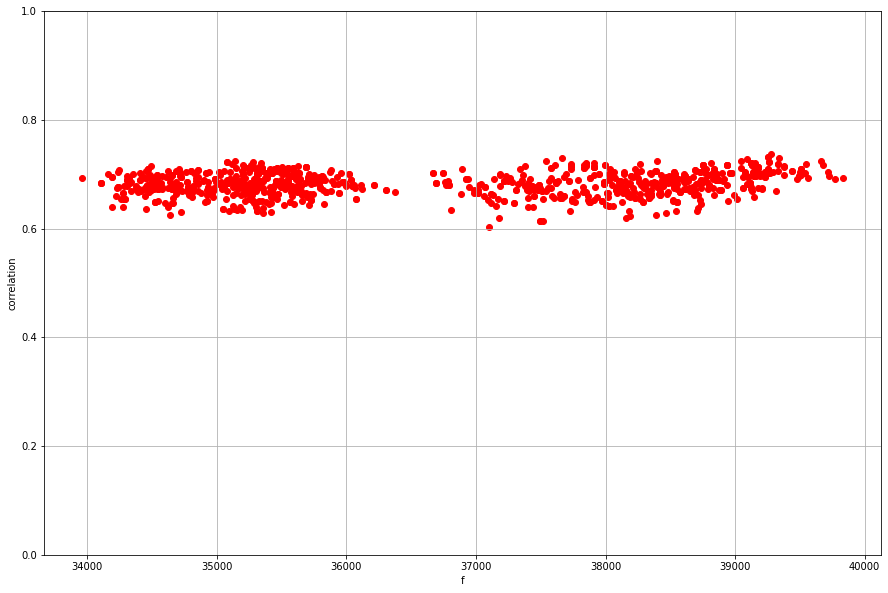

cyc_exp_edges_kroA200_to_best


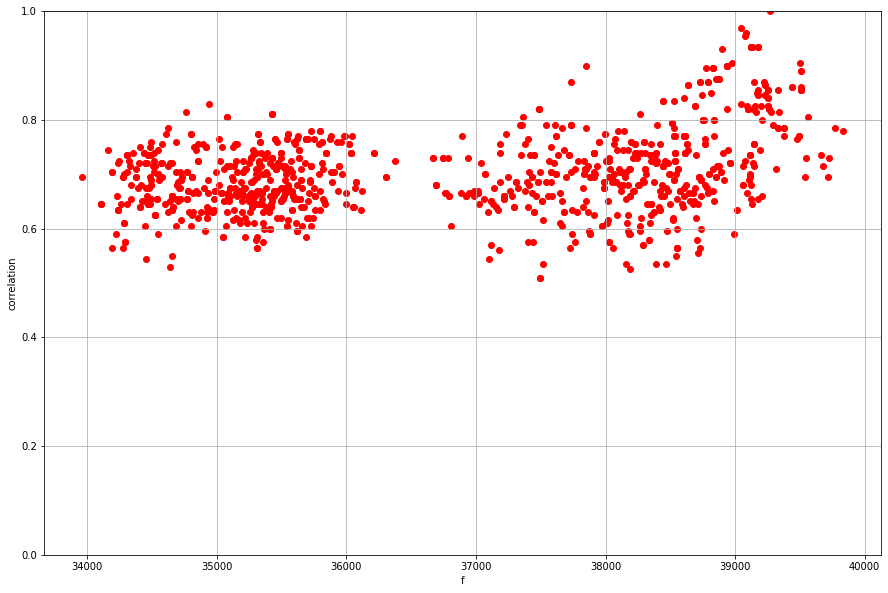

cyc_exp_edges_kroB200_avg


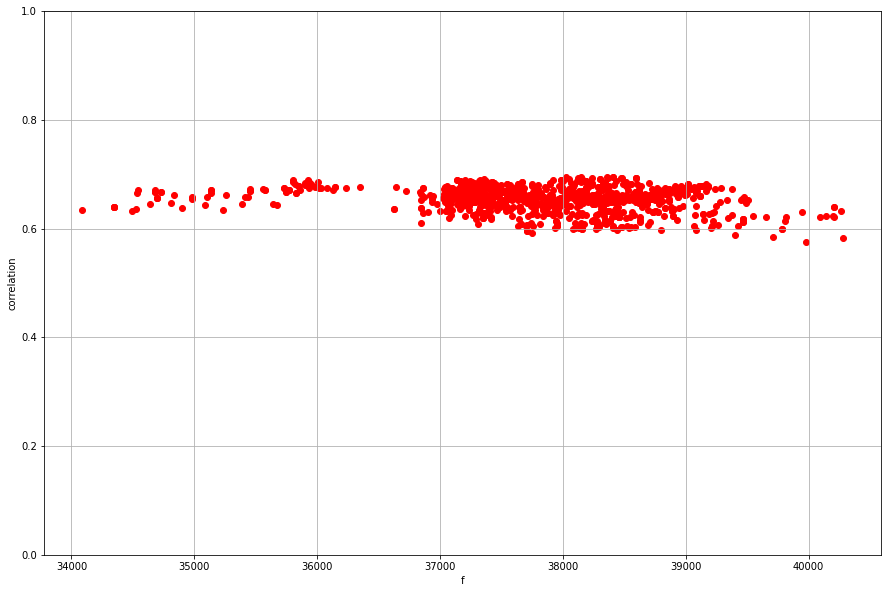

cyc_exp_edges_kroB200_to_best


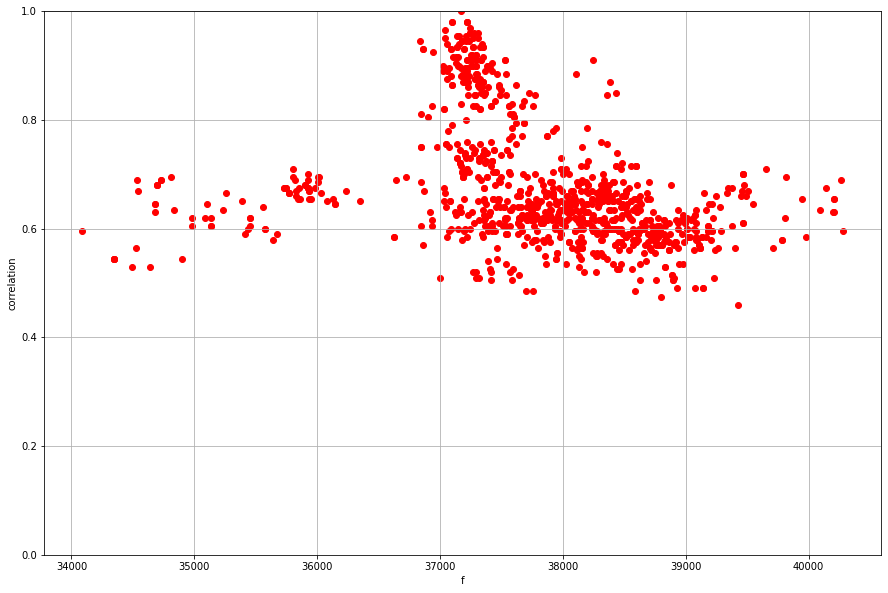

cyc_exp_vertices_kroA200_avg


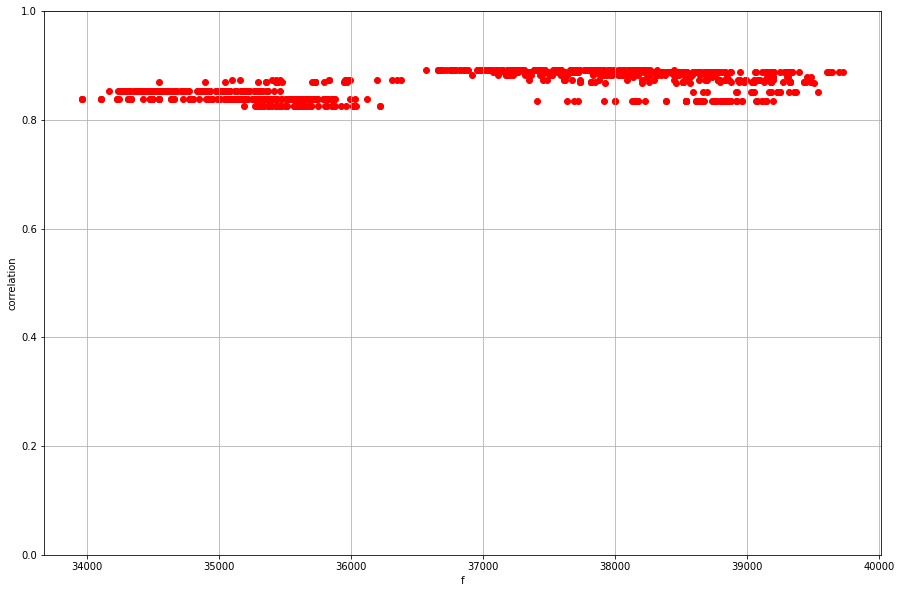

cyc_exp_vertices_kroA200_to_best


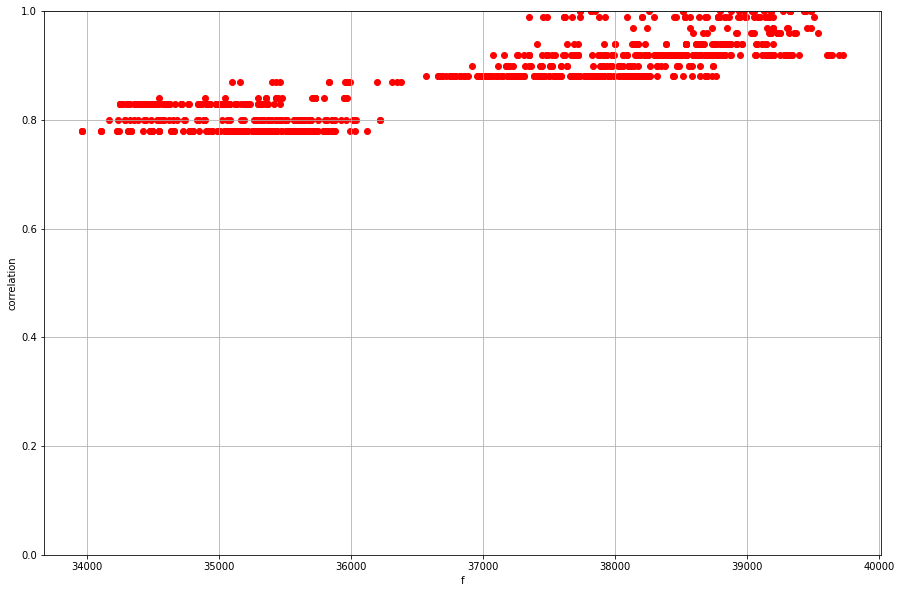

cyc_exp_vertices_kroB200_avg


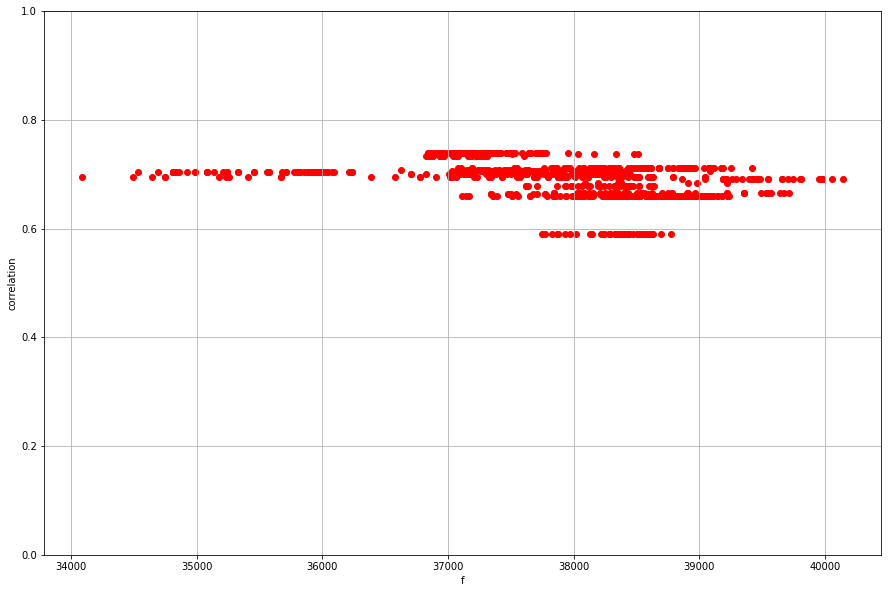

cyc_exp_vertices_kroB200_to_best


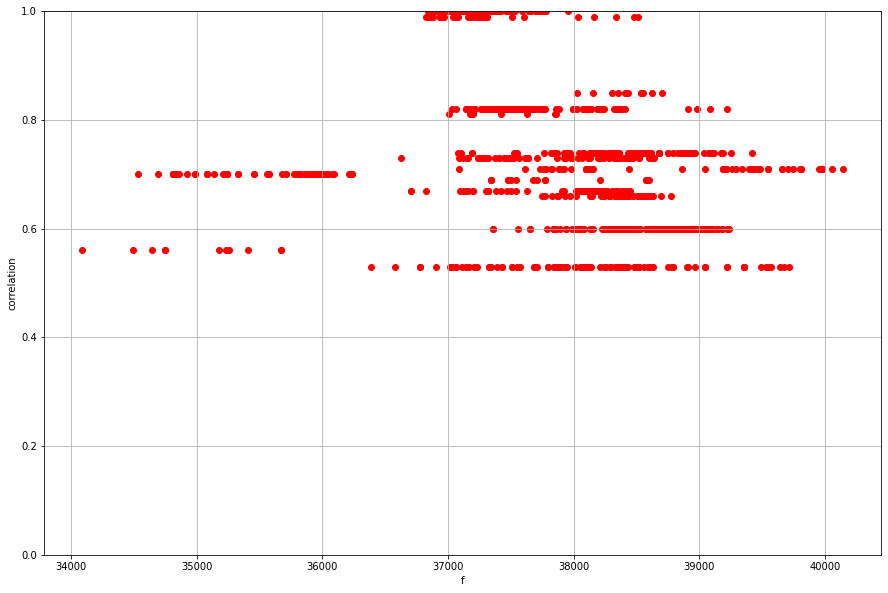

greedy_edges_kroA200_avg


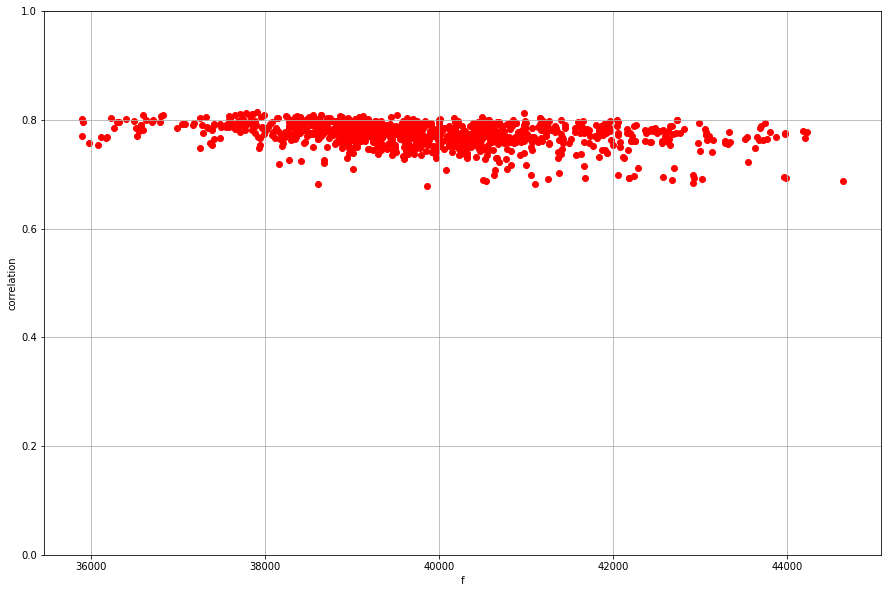

greedy_edges_kroA200_to_best


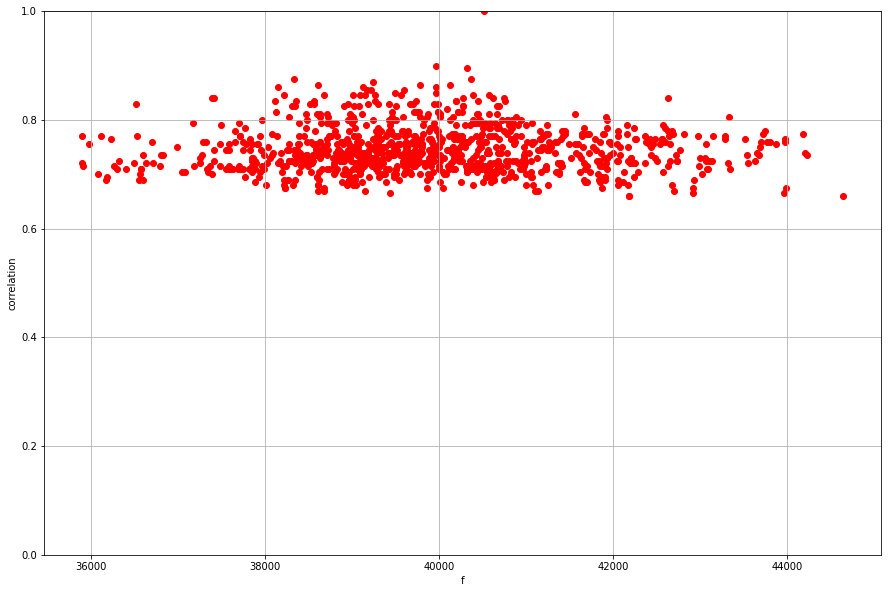

greedy_edges_kroB200_avg


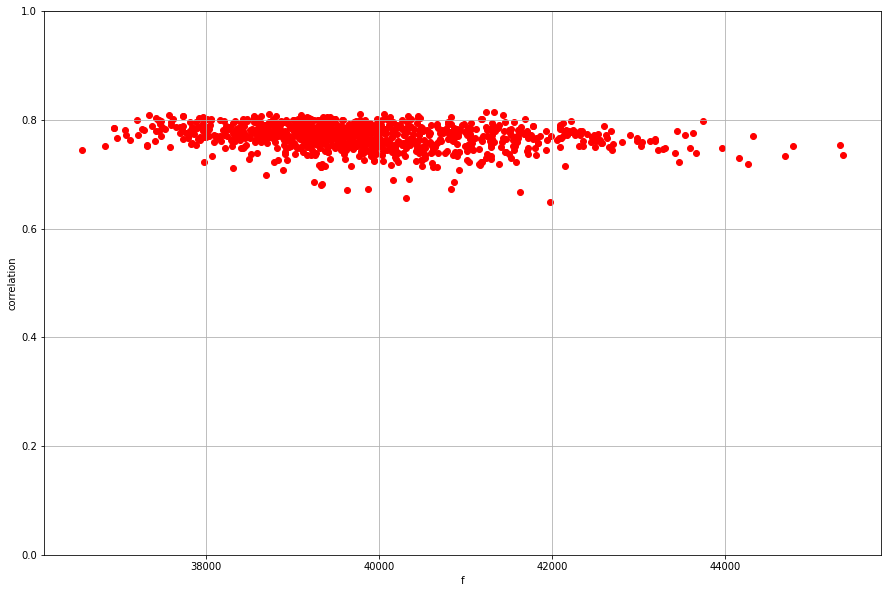

greedy_edges_kroB200_to_best


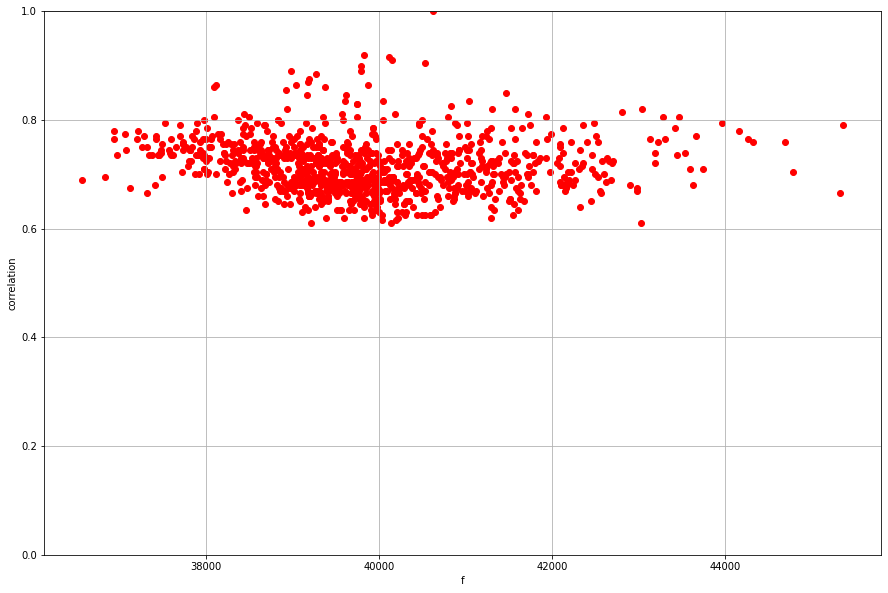

greedy_vertices_kroA200_avg


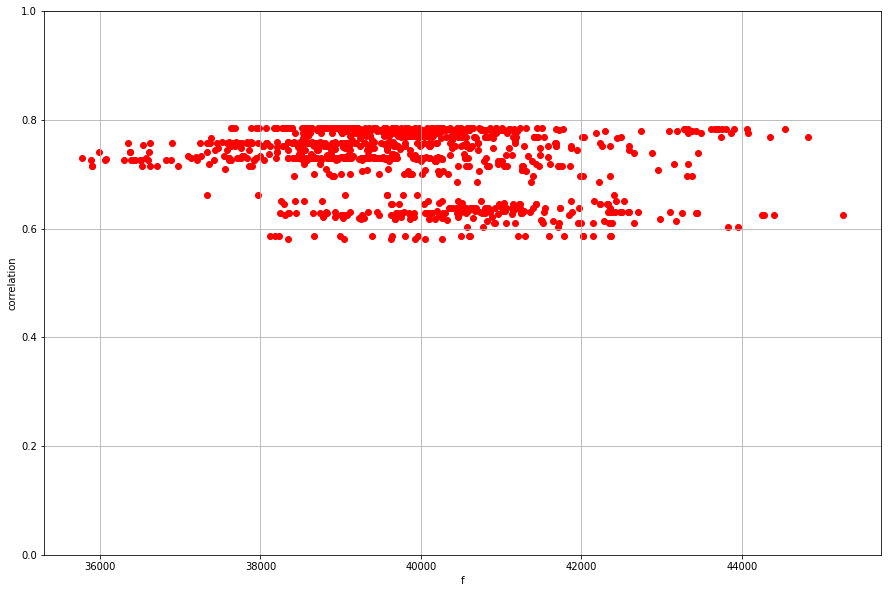

greedy_vertices_kroA200_to_best


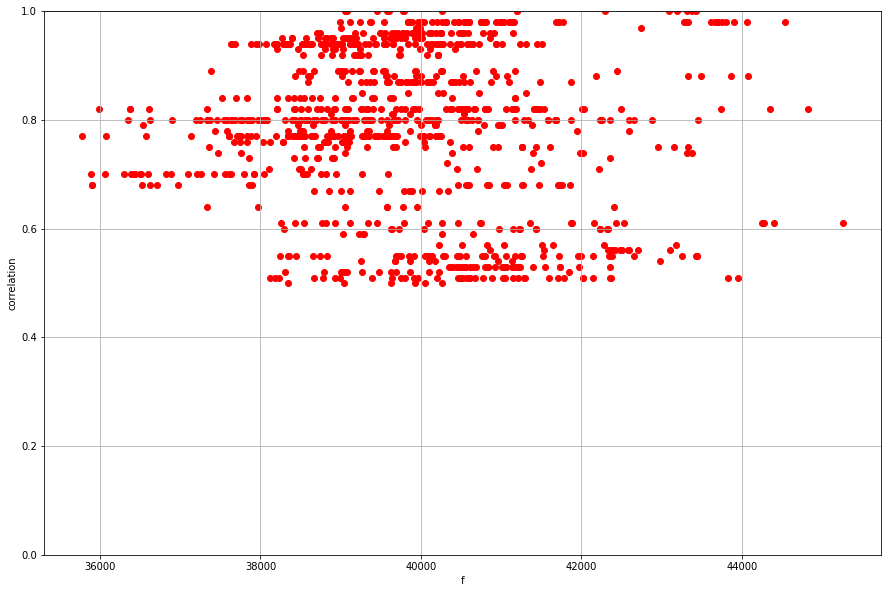

greedy_vertices_kroB200_avg


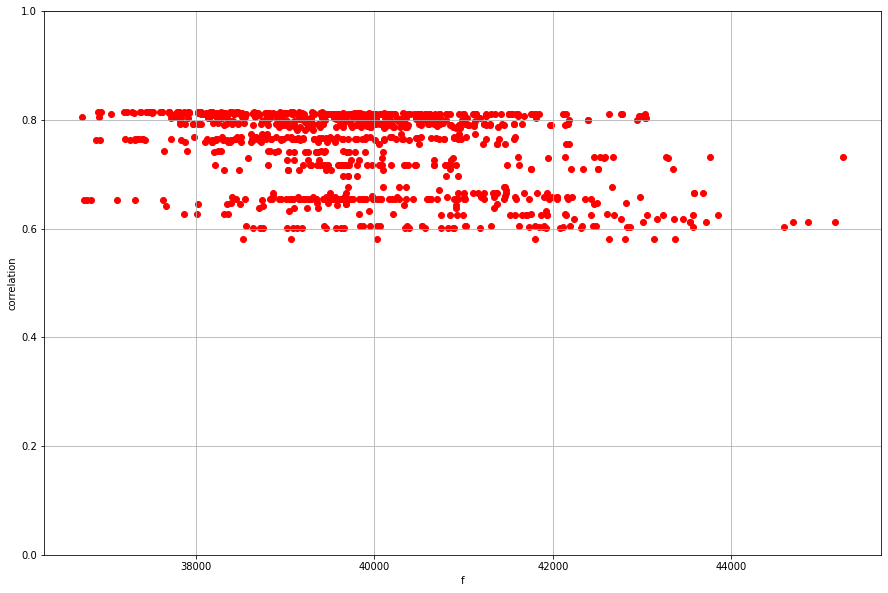

greedy_vertices_kroB200_to_best


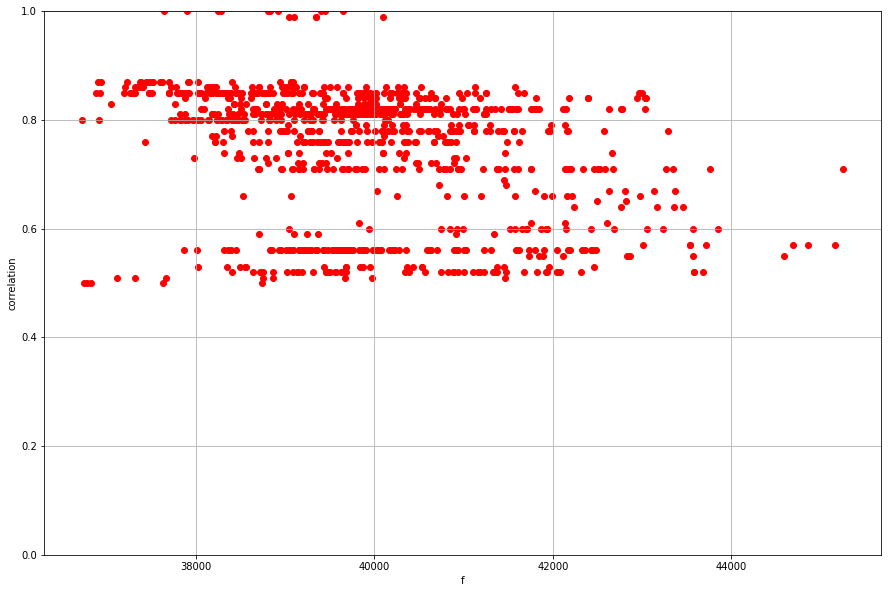

lp_edges_kroA200_avg


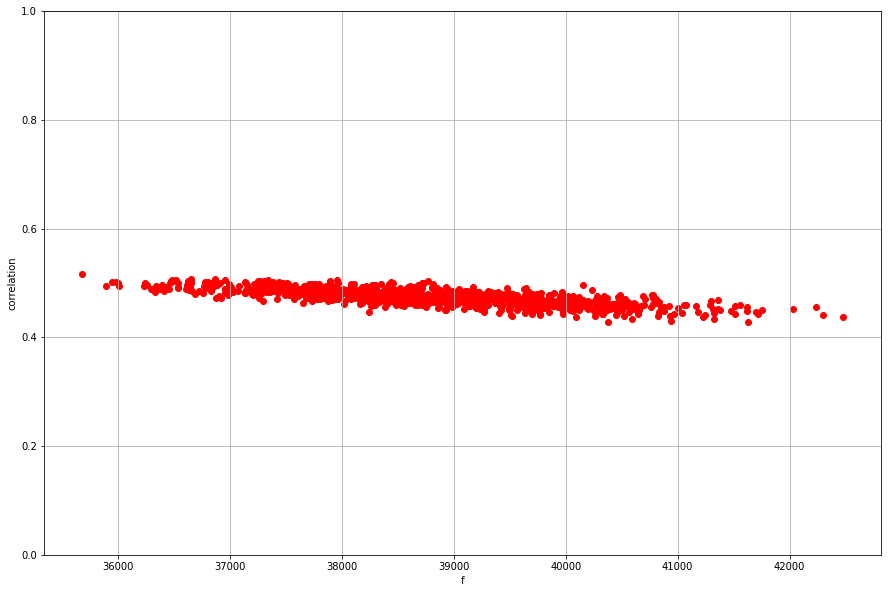

lp_edges_kroA200_to_best


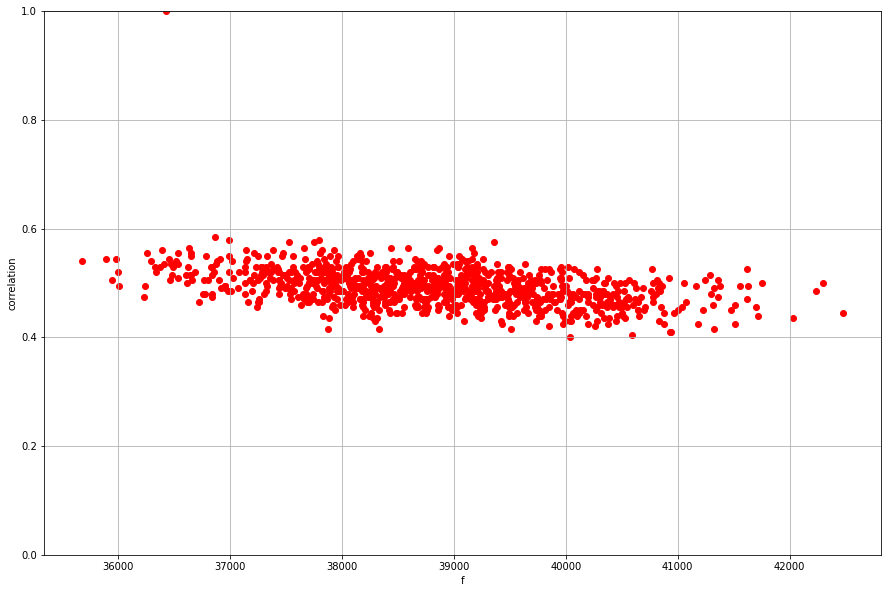

lp_edges_kroB200_avg


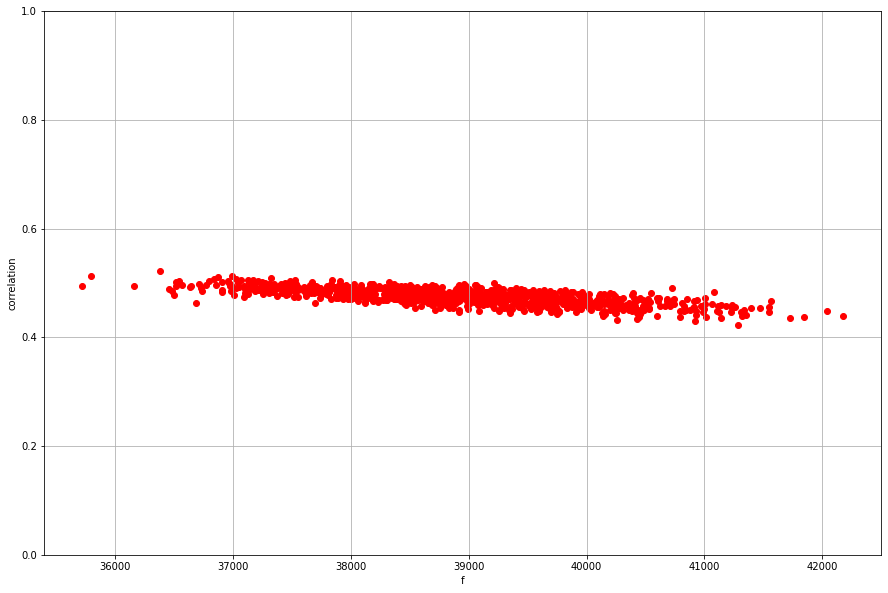

lp_edges_kroB200_to_best


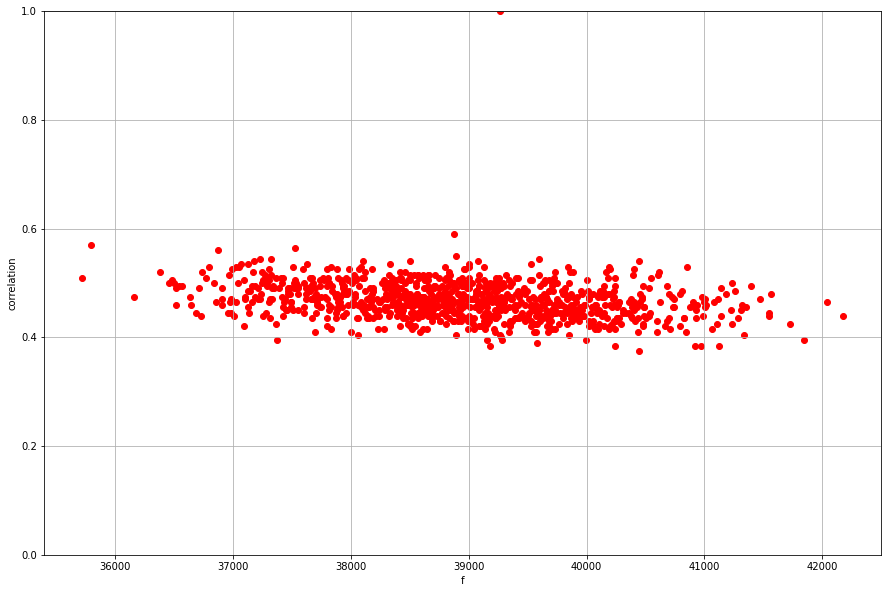

lp_vertices_kroA200_avg


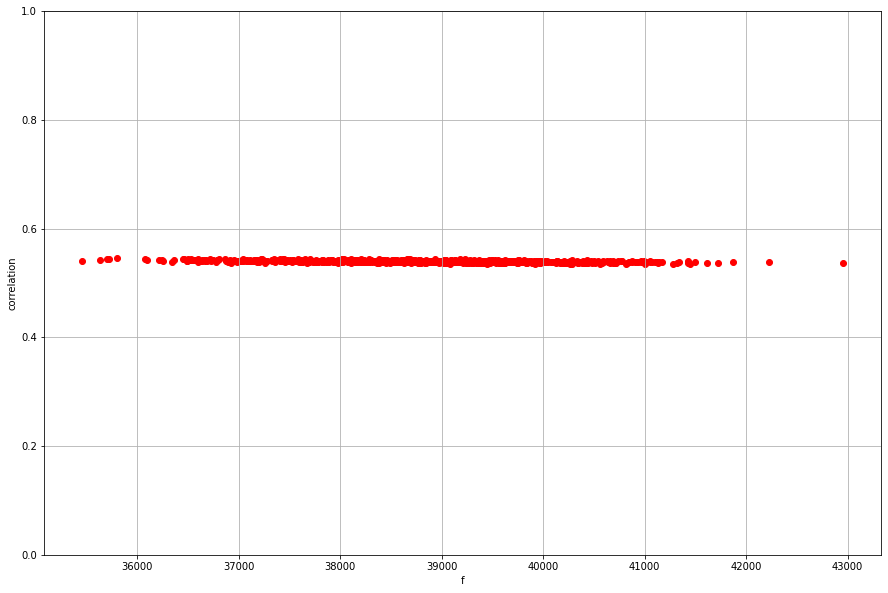

lp_vertices_kroA200_to_best


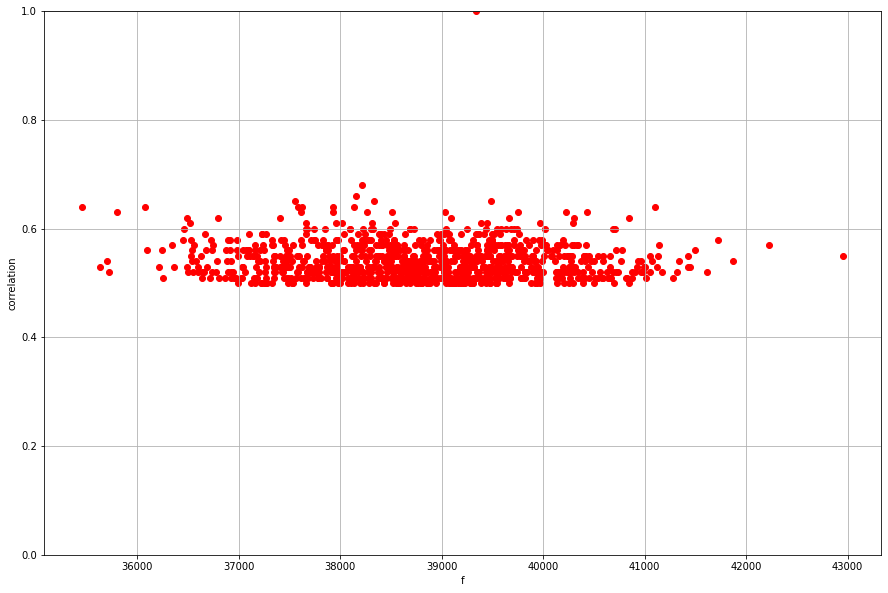

lp_vertices_kroB200_avg


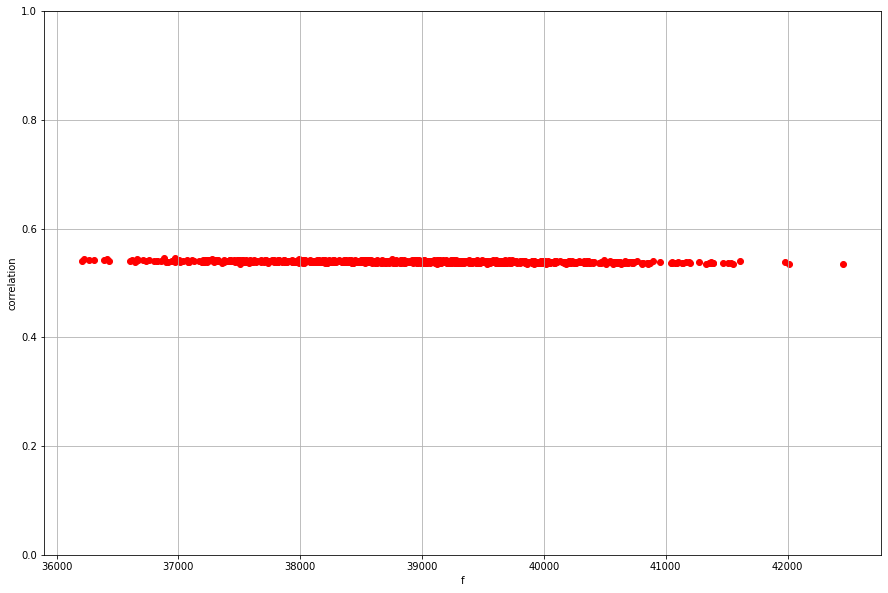

lp_vertices_kroB200_to_best


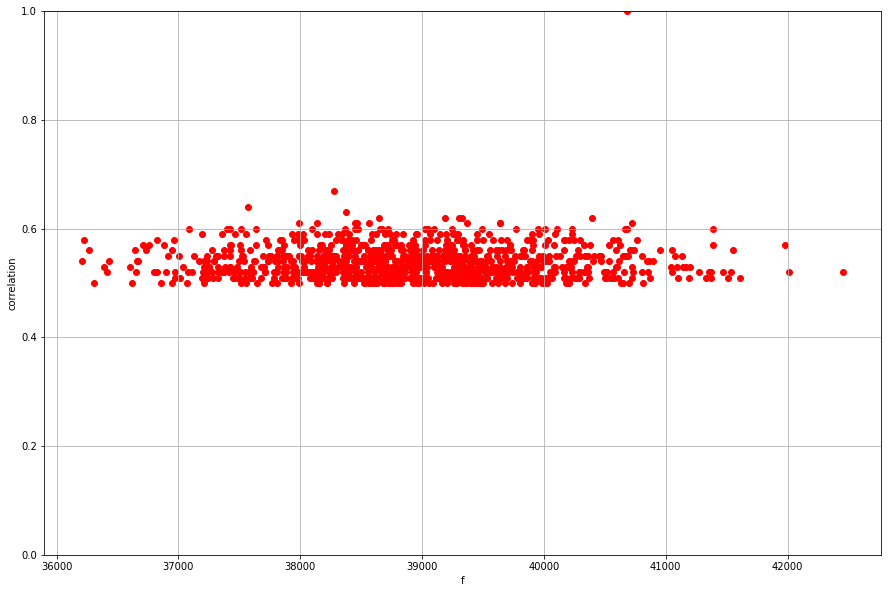

In [24]:
import matplotlib.pyplot as plt

for c in configs:
    print(c)
    fig = plt.figure(figsize=(15, 10))
    plt.scatter(x=configs[c][:,0], y=configs[c][:,1], color='r')
    plt.ylabel("correlation")
    plt.xlabel("f")
    plt.grid()
    plt.ylim([0,1])
    plt.show()